In [81]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_predict

# Question 1

In [2]:
df = pd.read_csv('annual-motor-vehicle-inspection-passing-rate-of-motor-vehicles-on-first-inspection.csv')
df.head()

,year,type,age,number_reported,number_passed,passing_rate
0,2006,Cars,1,455,432,94.9
1,2006,Cars,2,1082,1026,94.8
2,2006,Cars,3,73558,68432,93.0
3,2006,Cars,4,627,560,89.3
4,2006,Cars,5,17963,16716,93.1


In [3]:
mask_mc = df['type'] == 'Motorcycles'
df_motor = df[mask_mc]

#### Task 1:

In [4]:
Passing_rates = df_motor.groupby('year').mean()['passing_rate']
print(Passing_rates)

year
2006    92.990909
2007    93.686925
2008    93.870527
2009    93.873521
2010    93.981256
2011    94.045351
2012    92.791833
2013    89.050335
2014    83.116493
2015    86.459294
2016    87.506665
2017    87.604945
Name: passing_rate, dtype: float64


#### Task 2:

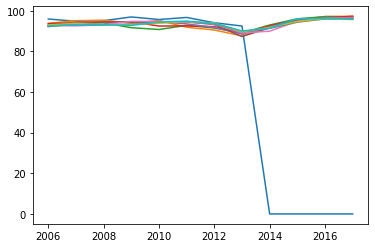

In [5]:
for i in range(1,11):
    age = df_motor[df_motor['age'] == str(i)]
    plt.plot(age['year'], age['passing_rate'])

There seem to be a change in external factor in 2013.
Use autoregressive model from 2013 onwards

In [6]:
passing_rate_2018 = []
for i in range(1,11):
    age = df_motor[df_motor['age'] == str(i)]
    model = AutoReg(age['passing_rate'][-5:], lags=1)
    model_fit = model.fit()
    # plot_predict(model_fit, dynamic=False)
# make prediction
    yhat = model_fit.predict(len(age['passing_rate'][-5:]), len(age['passing_rate'][-5:]))
    passing_rate_2018.append(yhat)

c:\Users\Benny\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Benny\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Benny\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
c:\Users\Benny\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: V

In [7]:
for i in range(10):
    print(f'passing rate for motorcycles of age {2018 + i} = {passing_rate_2018[i].item()}')

passing rate for motorcycles of age 2018 = 0.0
passing rate for motorcycles of age 2019 = 97.82152694935766
passing rate for motorcycles of age 2020 = 97.38319980006456
passing rate for motorcycles of age 2021 = 97.74074068005366
passing rate for motorcycles of age 2022 = 96.67068927992972
passing rate for motorcycles of age 2023 = 96.60662488516851
passing rate for motorcycles of age 2024 = 97.31512391940159
passing rate for motorcycles of age 2025 = 97.05707610869648
passing rate for motorcycles of age 2026 = 96.10542198970717
passing rate for motorcycles of age 2027 = 96.04313921591688


#### Task 3:

c:\Users\Benny\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Benny\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Benny\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
c:\Users\Benny\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: V

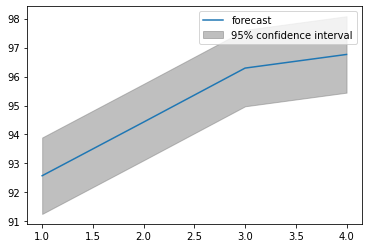

In [8]:
age = df_motor[df_motor['age'] == '5']
model = AutoReg(age['passing_rate'][-5:], lags=1)
model_fit = model.fit()
plot_predict(model_fit, dynamic=False)
# make prediction
yhat = model_fit.get_prediction(len(age['passing_rate'][-5:]), len(age['passing_rate'][-5:]))

In [9]:
yhat.conf_int(0.05)['lower'].item()

95.3530393913807

In [10]:
print(f'upper range of prediction interval for 5-year age group in 2018: {yhat.conf_int(0.05)["upper"].item()}')
print(f'lower range of prediction interval for 5-year age group in 2018: {yhat.conf_int(0.05)["lower"].item()}')

upper range of prediction interval for 5-year age group in 2018: 97.98833916847873
lower range of prediction interval for 5-year age group in 2018: 95.3530393913807


# Question 2

In [74]:
df = pd.read_csv('cea-salespersons-property-transaction-records-residential.csv')
df.head()

C:\Users\Benny\AppData\Local\Temp/ipykernel_2412/391389510.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cea-salespersons-property-transaction-records-residential.csv')


,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location
0,MUHAMMAD NORIZZAM BIN KAMARUZAMAN,AUG-2018,R057250D,HDB,RESALE,BUYER,BUKIT PANJANG,-,-
1,LIM JOO HENG,AUG-2018,R011043H,HDB,RESALE,SELLER,BUKIT PANJANG,-,-
2,WONG TSU HAW,MAY-2017,R045055G,HDB,RESALE,SELLER,BUKIT PANJANG,-,-
3,TAY BEE KIAT,JUL-2018,R056733J,HDB,RESALE,SELLER,BUKIT PANJANG,-,-
4,SNG KIM ENG ANGELA,JAN-2017,R045695D,HDB,RESALE,BUYER,SENGKANG,-,-


Task 1:

In [12]:
df['transaction_year'] = pd.to_datetime(df['transaction_date']).dt.year
# convert object-type transaction_date to transaction_year column for easy grouping

In [13]:
grouped_data = df.groupby(['salesperson_name','transaction_year'])['transaction_year'].size().sort_values()
grouped_data

salesperson_name         transaction_year
TAN ANN GIE, ANGELA      2020                  1
JOYCE ONG SIEW WAN       2019                  1
JOYCE NG MEI YI          2022                  1
SIEW JIA SHENG, MARK     2022                  1
SIEW KOK HO              2019                  1
                                            ... 
YEO LEE KIOW             2020                287
KUAH KAI PIN, KAVIN      2020                342
                         2021                406
TEO KOK CHENG, BENJAMIN  2020                548
-                        2020                734
Name: transaction_year, Length: 91213, dtype: int64

In [80]:
pop_dis = grouped_data.groupby('transaction_year').agg([np.mean,np.var,np.size])
# means, variance and size of sample for every year in data
pop_dis

,mean,var,size
transaction_year,,,
1976,1.000000,NaN,1
2000,1.000000,0.000000,3
2001,1.000000,0.000000,7
2002,1.833333,4.166667,6
2008,1.000000,0.000000,2
2010,1.000000,NaN,1
2012,1.000000,0.000000,3
2017,3.612380,35.216067,8627
2018,3.925844,49.254844,9089


In [65]:
past_five_years_pop_dis = pop_dis[-5:]
past_five_years_pop_dis
# means, variance and size of sample for every year in data

,mean,var,size
transaction_year,,,
2018,3.925844,49.254844,9089
2019,3.723814,42.735785,8201
2020,8.710495,194.890307,21333
2021,7.102014,120.721496,28349
2022,5.005901,45.929920,15591


In [82]:
five_years_mean = np.mean(past_five_years_pop_dis['mean'].values)
print(f"Expected sales of closed by an agent in a year, based on past 5 years data: {five_years_mean}")
five_years_total_count = np.sum(past_five_years_pop_dis['size'])
five_year_variance = np.sum(
    (past_five_years_pop_dis['size'] / (five_years_total_count - 5))
    * pop_dis['var'])
five_year_sd = np.sqrt(five_year_variance)
print(f'Variantion of sales within agents, based on past 5 years data: {five_year_sd}')
# formula for average means and variance of multiple distribution from https://stats.stackexchange.com/questions/80805/averaging-multiple-distributions?noredirect=1&lq=1
# assuming from the same normal distribution

Expected sales of closed by an agent in a year, based on past 5 years data: 5.693613818689609
Variantion of sales within agents, based on past 5 years data: 10.495474611238677
